In [14]:
import pandas as pd
import numpy as np
import sys, os, io
import re

from random import shuffle
from nltk.stem.snowball import PorterStemmer
import spacy
from nltk import ngrams
import matplotlib.pyplot as plt
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess, simple_tokenize
from sklearn.cross_validation import KFold
from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_auc_score
%matplotlib inline
import nltk

In [11]:
def plot_pattern_country(df, col, xlower, xupper, ylower, yupper, title, statistic=np.mean):
    '''
    A refined version of the "plot_pattern() function above"
    df: the dataframe to be plotted
    col: the column to be plotted. The column should contain a numerical list
    e.g. [1, 9, 3, 16, 8, 8, 1, 3, 7, 1, 11, 2, 4]
    statistic: a function to calculate certain empirial moment for a given list. e.g. np.mean()
    xlower: plt.xlim's lower end
    xupper: plt.xlim's upper end
    ylower: plt.ylim's lower end
    yupper: plt.ylim's upper end
    title: title of the whole figure
    
    Returns:
    None
    
    E.g. plot_pattern_country(df_1, 'DT_ROOT_idx', np.median, 0, 20, 0, 0.5, 'ROOT Word Position per Country')
    '''
    countries = list(df.groupby('label').size().index)
    fig, axs = plt.subplots(3,3)
    for c, ax in zip(countries, axs.flatten()):
        data = df[df['label']==c][col].apply(lambda x: statistic(x))
        ax.hist(data, bins=10, normed=1)
        ax.set_xlim(xlower, xupper)
        ax.set_ylim(ylower, yupper)
        ax.set_title(c)
    fig.suptitle(title, fontsize=20)
    fig.set_size_inches(18.5, 10.5, forward=True)
    return None

In [6]:
df_1=pd.read_pickle('data/pickles/final_df_20180111.pkl')

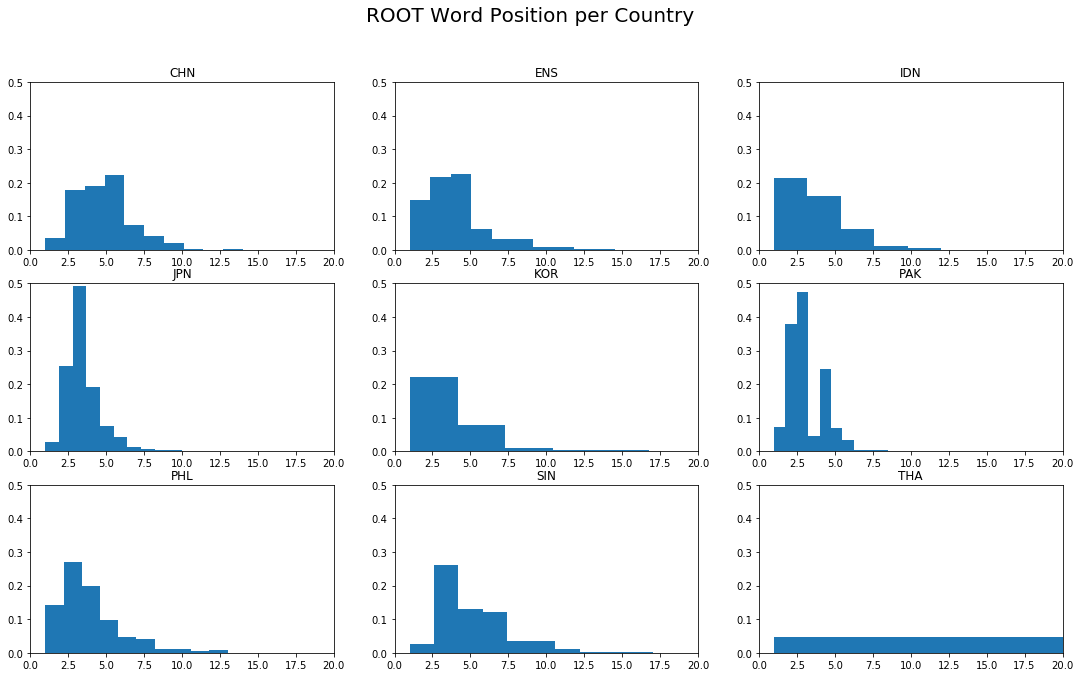

In [15]:
plot_pattern_country(df_1, 'DT_ROOT_idx', 0, 20, 0, 0.5, 'ROOT Word Position per Country', np.median)